In [2]:
import decimal
import boto3
from boto3.dynamodb.conditions import Key, Attr

DEFAULT_REGION = 'eu-west-1'
KEY_CONSTRAINT = '49-TPE'

class DynamoDB(object):
    def __init__(self, region_name):
        self.db = boto3.resource('dynamodb', region_name=region_name)

def deserialize(o):
    if isinstance(o, decimal.Decimal):
        if abs(o) % 1 > 0:
            return float(o)
        else:
            return int(o)
    return o

dynamo = DynamoDB(region_name=DEFAULT_REGION)
arrivals_ = (dynamo.db.Table('TrainArrival').query(
    KeyConditionExpression=Key('TrainStation').eq(KEY_CONSTRAINT),
    ProjectionExpression='DifferenceInMinutes'))['Items']

ResourceNotFoundException: An error occurred (ResourceNotFoundException) when calling the Query operation: Requested resource not found

In [41]:
import pandas as pd

df = pd.DataFrame(arrivals)
df = df.applymap(lambda x: deserialize(x))

df.head()

,DifferenceInMinutes
0,6.0
1,14.0
2,57.0
3,2.0
4,2.0


<Figure size 1800x720 with 0 Axes>

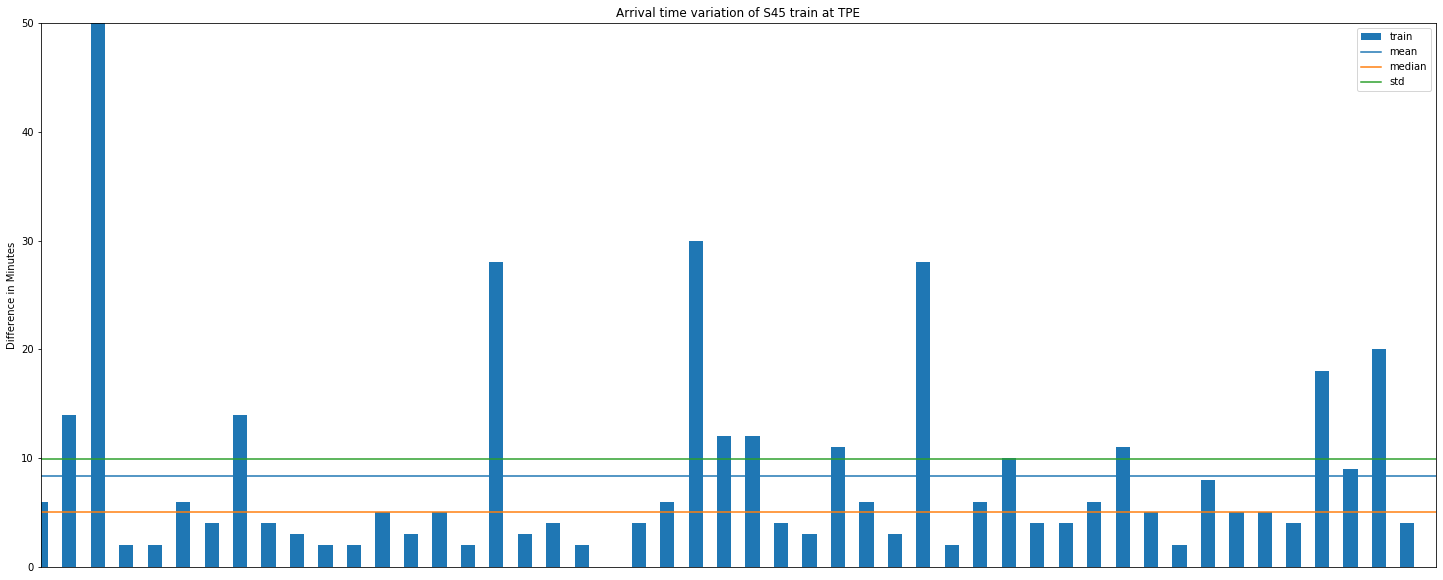

In [37]:
import matplotlib.pyplot as plt
from pandas import Series

plt.rcParams['figure.figsize'] = [25, 10]
plt.figure();
df.columns = ['train']
ax = df.plot(kind='bar')
pd.DataFrame(Series([float(df.mean())]*len(df)), columns=['mean']).plot(ax=ax)
pd.DataFrame(Series([float(df.median())]*len(df)), columns=['median']).plot(ax=ax)
pd.DataFrame(Series([float(df.std())]*len(df)), columns=['std']).plot(ax=ax)
plt.ylim(int(df.min()),50)
plt.title('Arrival time variation')
plt.ylabel('Difference in Minutes')
ax.get_xaxis().set_visible(False)
plt.show()